# GNSS TEC - CEDAR Madrigal

http://cedar.openmadrigal.org/

- Access data
    - Select single experiment

- Instrument category: Distributed Ground Based Satellite Receivers
- Instrument: World-wide GNSS Receiver Network

- World-wide TEC from GPS/GLONASS: 2024-03-23 00:00:00-2024-03-24 00:00:00
    - gps240323g.002.hdf5: TEC binned 1 degree by 1 degree by 5 min - final
    - Download file -> As is -> Hdf5: `gps240323g.002.hdf5` / netCDF4: `gps240323g.002.nc`

- World-wide TEC from GPS/GLONASS: 2024-03-24 00:00:00-2024-03-25 00:00:00
    - gps240323g.002.hdf5: TEC binned 1 degree by 1 degree by 5 min - final
    - Download file -> As is -> Hdf5: `gps240324g.002.hdf5` / netCDF4: `gps240324g.002.nc`

- Plots/Docs
    - [Papers describing processing algorithms used](http://cedar.openmadrigal.org/static/siteSpecific/GpsPaperList.html)
    - [Data source list for TEC processing](http://cedar.openmadrigal.org/static/siteSpecific/tec_sources.html)
    - [Python programming tips for reading line-of-site TEC files](http://cedar.openmadrigal.org/static/siteSpecific/programming_tips.pdf)

- Plots/Docs
    - [Click here for TEC maps for 2024-03-23](http://cedar.openmadrigal.org/static/experiments4/2024/gps/23mar24/images/index.html)
    - [Click here for TEC maps for 2024-03-24](http://cedar.openmadrigal.org/static/experiments4/2024/gps/24mar24/images/index.html)
    - [Click here for plots of raw LOS converted to vertical TEC for 2024-03-23](http://cedar.openmadrigal.org/static/experiments4/2024/gps/23mar24/plots/index.html)
    - [Click here for plots of raw LOS converted to vertical TEC for 2024-03-24](http://cedar.openmadrigal.org/static/experiments4/2024/gps/24mar24/plots/index.html)

## TEC map

Individual images of world-wide TEC for 20 minute periods:

![](fig/20240323_tec-18-00.png)
![](fig/20240324_tec-18-00.png)

## TEC plots

Vertical TEC plots at 5 minute intervals using raw measurements from all gps receivers

![](fig/20240323_vtec1080.png)
![](fig/20240324_vtec1080.png)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.time import Time
import cartopy.crs as ccrs

## Hdf4

In [ ]:
import h5py
import datetime

def getTimeGpsData(madrigalFile, timeArr, startUnix, endUnix):
    """getTimeGpsData returns a numpy recarray of all the data in
madrigalFile from a given time range
    Inputs:
        madrigalFile - path to Madrigal LOS Hdf5 file
        timeArr - a numpy array of the times (ut1_unix) in the entire
file.
        startUnix - the unix timestamp at start of range
        endUnix - the unix timestamp at end of range
    Returns a numpy recarray of the subset of data from the file from
that time range
    """
    with h5py.File(madrigalFile, 'r') as f:
        # get a list of all the indices with the right time range
        indices = np.logical_and(timeArr >= startUnix, timeArr <= endUnix)
        timeData = f['Data']['Table Layout'][indices]
        return(timeData)

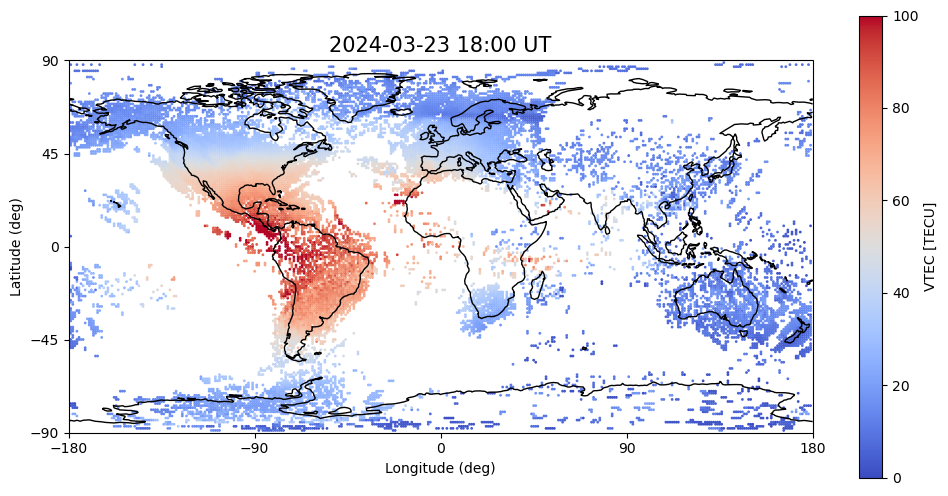

In [ ]:
start_dt = datetime.datetime(2024,3,23,18,0, tzinfo=datetime.timezone.utc)
end_dt = datetime.datetime(2024,3,23,18,1, tzinfo=datetime.timezone.utc)

losFilename = 'data/Madrigal_TEC/gps240323g.002.hdf5'
# get data from the time range
with h5py.File(losFilename, 'r') as f:
    timeArr = f['Data']['Table Layout']['ut1_unix']
timeData = getTimeGpsData(losFilename, timeArr, start_dt.timestamp(), end_dt.timestamp())

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))
ax.coastlines()
sc = ax.scatter(timeData['glon'], timeData['gdlat'], c=timeData['tec'], vmin=0, vmax=100, cmap='coolwarm', s=1)
ax.set_xlabel("Longitude (deg)")
ax.set_ylabel("Latitude (deg)")
ax.set_yticks([-90,-45,0,45,90])
ax.set_xticks([-180,-90,0,90,180])
ax.set_ylim([-90,90])
ax.set_xlim([-180,180])    
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('VTEC [TECU]')
ax.set_title(f"{start_dt.strftime('%Y-%m-%d %H:%M')} UT", fontsize=15)
cbar.ax.tick_params()
plt.show()

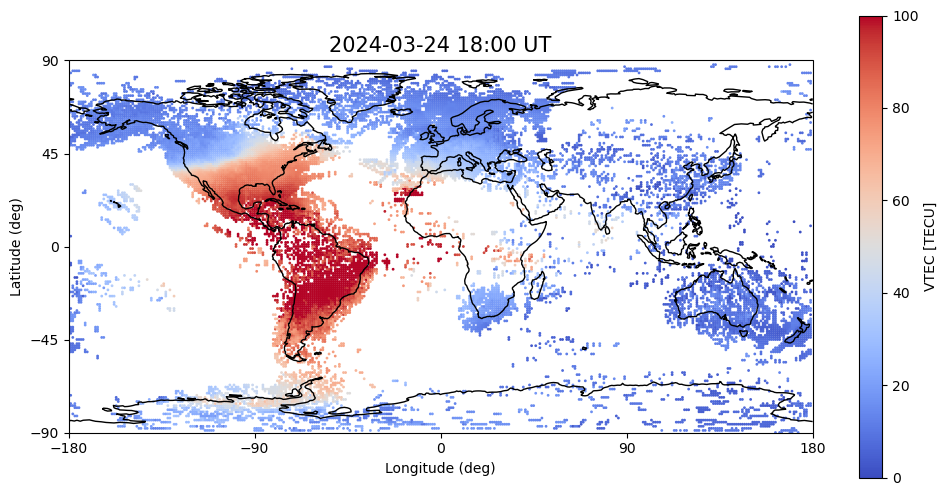

In [ ]:
start_dt = datetime.datetime(2024,3,24,18,0, tzinfo=datetime.timezone.utc)
end_dt = datetime.datetime(2024,3,24,18,1, tzinfo=datetime.timezone.utc)

losFilename = 'data/Madrigal_TEC/gps240324g.002.hdf5'
# get data from the time range
with h5py.File(losFilename, 'r') as f:
    timeArr = f['Data']['Table Layout']['ut1_unix']
timeData = getTimeGpsData(losFilename, timeArr, start_dt.timestamp(), end_dt.timestamp())

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))
ax.coastlines()
sc = ax.scatter(timeData['glon'], timeData['gdlat'], c=timeData['tec'], vmin=0, vmax=100, cmap='coolwarm', s=1)
ax.set_xlabel("Longitude (deg)")
ax.set_ylabel("Latitude (deg)")
ax.set_yticks([-90,-45,0,45,90])
ax.set_xticks([-180,-90,0,90,180])
ax.set_ylim([-90,90])
ax.set_xlim([-180,180])    
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('VTEC [TECU]')
ax.set_title(f"{start_dt.strftime('%Y-%m-%d %H:%M')} UT", fontsize=15)
cbar.ax.tick_params()
plt.show()

## netCDF4

In [ ]:
import netCDF4

dict_keys(['timestamps', 'gdlat', 'glon', 'dtec', 'tec'])
(288, 180, 360)


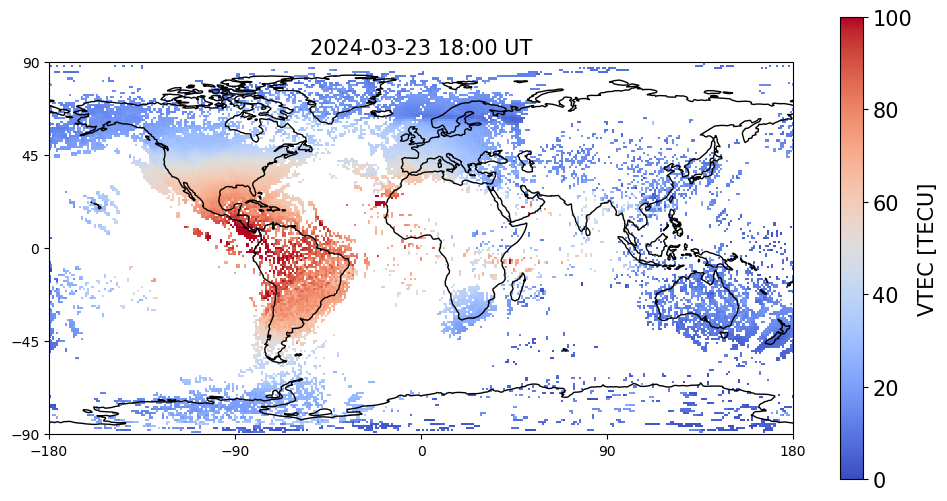

In [ ]:
nc = netCDF4.Dataset('data/Madrigal_TEC/gps240323g.002.nc', 'r')
print(nc.variables.keys())
nc_tec = nc['tec']
tec = nc_tec[:]
print(tec.shape)  # (time, lat, lon)

nc_lon = nc['glon']
lon = nc_lon[:]
nc_lat = nc['gdlat']
lat = nc_lat[:]

# Define the start time and time interval
start_time = Time("2024-03-23 00:00:00")
num_intervals = 288
time_interval = 5 * u.minute

# Create the time array
time_array = start_time + np.arange(num_intervals) * time_interval

tidx = 216
data_slice = tec[tidx, :, :]
lon_grid, lat_grid = np.meshgrid(lon, lat)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))
plot = ax.pcolormesh(lon_grid, lat_grid, data_slice, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=0, vmax=100)
ax.coastlines()
ax.set_yticks([-90,-45,0,45,90])
ax.set_xticks([-180,-90,0,90,180])
ax.set_ylim([-90,90])
ax.set_xlim([-180,180])    
# ax.add_feature(cfeature.BORDERS, linestyle=':')
# Add colorbar
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label('VTEC [TECU]', fontsize=15)
cbar.ax.tick_params(labelsize=15)
ax.set_title(f'{time_array[tidx].iso[:-7]} UT', fontsize=15)
# fig.savefig(f'tec_{tidx}.png')
plt.show()

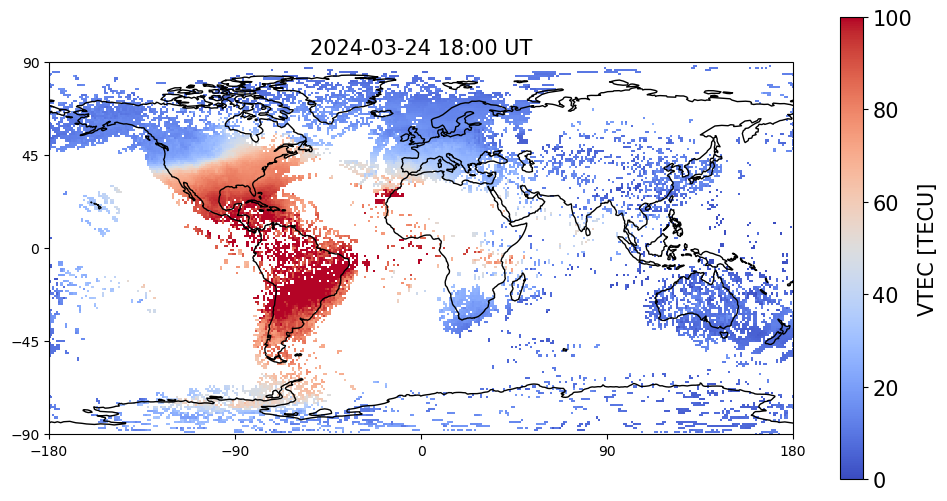

In [ ]:
nc = netCDF4.Dataset('data/Madrigal_TEC/gps240324g.002.nc', 'r')
nc_tec = nc['tec']
tec = nc_tec[:]
nc_lon = nc['glon']
lon = nc_lon[:]
nc_lat = nc['gdlat']
lat = nc_lat[:]

start_time = Time("2024-03-24 00:00:00")
num_intervals = 288
time_interval = 5 * u.minute
time_array = start_time + np.arange(num_intervals) * time_interval

tidx = 216
data_slice = tec[tidx, :, :]
lon_grid, lat_grid = np.meshgrid(lon, lat)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))
plot = ax.pcolormesh(lon_grid, lat_grid, data_slice, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=0, vmax=100)
ax.coastlines()
ax.set_yticks([-90,-45,0,45,90])
ax.set_xticks([-180,-90,0,90,180])
ax.set_ylim([-90,90])
ax.set_xlim([-180,180])    
cbar = plt.colorbar(plot, ax=ax)
cbar.set_label('VTEC [TECU]', fontsize=15)
cbar.ax.tick_params(labelsize=15)
ax.set_title(f'{time_array[tidx].iso[:-7]} UT', fontsize=15)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import netCDF4
from pathlib import Path
from tqdm import tqdm
# import cartopy.feature as cfeature

def draw_tec(fname):
    fname = Path(fname)
    nc = netCDF4.Dataset(fname, 'r')
    nc_tec = nc['tec']
    tec = nc_tec[:]
    nc_lon = nc['glon']
    lon = nc_lon[:]
    nc_lat = nc['gdlat']
    lat = nc_lat[:]

    name = fname.name.split('.')[0]
    output_dir = fname.parent / Path(f"out/{name}")
    output_dir.mkdir(exist_ok=True, parents=True)

    times = tec.shape[0]
    for tidx in tqdm(range(times)):
        data_slice = tec[tidx, :, :]
        lon_grid, lat_grid = np.meshgrid(lon, lat)
        fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 6))
        plot = ax.pcolormesh(lon_grid, lat_grid, data_slice, transform=ccrs.PlateCarree(), cmap='coolwarm', vmin=0, vmax=100)
        ax.coastlines()
        cbar = plt.colorbar(plot, ax=ax)
        cbar.set_label('VTEC [TECU]', fontsize=15)
        cbar.ax.tick_params(labelsize=15)
        ax.set_title(f'UT {time_array[tidx].iso[:-4]}', fontsize=15)

        fig.savefig(output_dir / f'tec_{name}_{tidx:04d}.png', bbox_inches='tight', pad_inches=0.1, dpi=300)
        plt.close(fig)

In [ ]:
draw_tec('data/Madrigal_TEC/gps240324g.002.nc')

100%|██████████| 288/288 [01:20<00:00,  3.59it/s]


In [ ]:
!python code/DMSP_SSUSI/png_to_mp4.py --input_dir "./data/Madrigal_TEC/out/gps240324g" --fps 40

In [ ]:
!python code/DMSP_SSUSI/mp4_to_gif.py --input_dir "./data/Madrigal_TEC/out/gps240324g" --width 400

![](data/Madrigal_TEC/out/gps240324g/output.gif)